In [1]:
%rm -rf stonks/

In [2]:
%%capture
!git clone https://github.com/IS737StockPicker/stonks

In [3]:
import pandas as pd
from datetime import datetime
from datetime import date
stock_data= pd.read_csv('/content/stonks/Stocks_march_sept.csv')
#stock_data['Date'] = stock_data['Date'].dt.date(stock_data['Date'])

stock_data["Date"] = pd.to_datetime(stock_data["Date"], errors='coerce',utc=True)
stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')
stock_data.head()
#stock_data.info()
#stock_data['Date'].day()
#stock_data.dtypes
#stock_data['Date'].astype()

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,2022-03-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2022-03-15,1,1,1,1,1,1,1,0,1,1,1,1,1,1.0
2,2022-03-16,0,1,0,1,1,1,1,1,1,1,0,1,1,1.0
3,2022-03-17,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0
4,2022-03-18,1,1,0,1,1,1,1,1,1,1,1,1,1,1.0


In [4]:
Guardian_Data= pd.read_csv('/content/stonks/guardian_data.csv')
Guardian_Data.head()

,Date,Headline Mean,Body Mean,Headline Median,Body Median,Headline Min,Headline Max,Body Min,Body Max
0,2022-03-13,-0.08,-0.15,0.00,-0.88,-0.89,0.89,-1.0,1.0
1,2022-03-14,-0.13,-0.01,0.00,-0.00,-0.78,0.72,-1.0,1.0
2,2022-03-15,-0.20,-0.12,-0.15,-0.54,-0.93,0.79,-1.0,1.0
3,2022-03-16,-0.08,-0.16,0.00,-0.55,-0.82,0.69,-1.0,1.0
4,2022-03-17,-0.10,-0.24,0.00,-0.85,-0.83,0.77,-1.0,1.0


In [5]:
Huff_News_Data = pd.read_csv('/content/stonks/Huff_News_Avg_News_Sentiment.csv')
Huff_News_Data.head()

,Date,Headline Mean,Body Mean,Headline Median,Body Median,Headline Max,Body Max,Headline Min,Body Min
0,2022-03-13,-0.24,0.05,-0.21,0.19,0.00,0.44,-0.54,-0.61
1,2022-03-14,-0.12,-0.06,0.00,0.00,0.74,0.30,-0.80,-0.67
2,2022-03-15,-0.44,-0.39,-0.46,-0.47,0.00,0.13,-0.76,-0.85
3,2022-03-16,0.10,-0.09,0.00,-0.13,0.51,0.40,-0.25,-0.56
4,2022-03-17,-0.20,-0.14,-0.03,-0.03,0.56,0.00,-0.90,-0.49


In [6]:
NYT_Data = pd.read_csv('/content/stonks/ny_times_merged_data.csv')
NYT_Data.head()

,Date,Headline Mean,Headline Median,Body Mean,Body Median,Headline Max,Headline Min,Body Max,Body Min
0,2022-03-13,-0.11,0.0,0.22,0.25,0.84,-0.86,0.95,-0.86
1,2022-03-14,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
2,2022-03-15,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
3,2022-03-16,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
4,2022-03-17,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89


# Merge Stock Data and News Data

In [7]:
daily_stock_mixed_news = stock_data.merge(Guardian_Data, how='inner', on='Date')
daily_stock_mixed_news = daily_stock_mixed_news.merge(Huff_News_Data, how='inner', on='Date')
daily_stock_mixed_news = daily_stock_mixed_news.merge(NYT_Data, how='inner', on='Date')

daily_stock_mixed_news.columns = daily_stock_mixed_news.columns.str.replace(' ', '_')
daily_stock_mixed_news['XLE'].sum()
daily_stock_mixed_news['XLI'].sum()
daily_stock_mixed_news.info()
sum_column = daily_stock_mixed_news.sum(axis=0)
print (sum_column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               125 non-null    object 
 1   XLE                125 non-null    int64  
 2   XLF                125 non-null    int64  
 3   XLU                125 non-null    int64  
 4   XLI                125 non-null    int64  
 5   XLK                125 non-null    int64  
 6   XLV                125 non-null    int64  
 7   XLY                125 non-null    int64  
 8   IYR                125 non-null    int64  
 9   AAPL               125 non-null    int64  
 10  XLB                125 non-null    int64  
 11  XLP                125 non-null    int64  
 12  SPY                125 non-null    int64  
 13  ^DJI               125 non-null    int64  
 14  NDX                125 non-null    float64
 15  Headline_Mean_x    125 non-null    float64
 16  Body_Mean_x        125 non

Preprocess the data:
Cleaning the data to avoid any missing values

In [8]:
daily_stock_mixed_news.dropna()

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Headline_Min_y,Body_Min_y,Headline_Mean,Headline_Median,Body_Mean,Body_Median,Headline_Max,Headline_Min,Body_Max,Body_Min
0,2022-03-14,0,0,0,0,0,0,0,0,0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,1,1,1,1,1,1,1,0,1,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,0,1,0,1,1,1,1,1,1,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1,1,1,1,1,1,1,1,1,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1,1,0,1,1,1,1,1,1,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-09-07,1,1,1,1,1,1,1,1,1,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
121,2022-09-08,0,1,1,1,1,1,1,1,0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
122,2022-09-09,1,1,0,1,1,1,1,1,1,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
123,2022-09-12,1,1,1,1,1,1,1,1,1,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


In [9]:
# load the data
stocks_df = pd.read_csv('/content/stonks/master_data.csv')
stocks_df

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-09-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
121,2022-09-08,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
122,2022-09-09,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
123,2022-09-12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


In [10]:
tickers = stocks_df.iloc[:,:15]
tickers = tickers.drop(columns=['Date'])
tickers

,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
121,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
122,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
123,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [37]:
# Acquire Baseline Accuracy Scores

baseline_acc = {}
for ticker in tickers:
  baseline_acc[ticker] = round(sum(stocks_df[ticker])/125,2)
  print(ticker +": "+str(sum(stocks_df[ticker])/125))

XLE: 0.544
XLF: 0.536
XLU: 0.52
XLI: 0.592
XLK: 0.544
XLV: 0.568
XLY: 0.504
IYR: 0.504
AAPL: 0.568
XLB: 0.48
XLP: 0.544
SPY: 0.568
^DJI: 0.536
NDX: 0.52


# Data Analysis using Decision Tree Classifier to Predict Stock price Indicators Based on News Sentiment and Market Data. 


*master_data.csv*

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

accuracy_scores = {}
test_size = 0.28
random_state = 5

for ticker in tickers:
    mean_headline_var = [ticker, 'guardian_headline_mean', 'Huff_headline_mean', 'NYT_headline_mean']
    median_body_var = [ticker, 'guardian_body_median', 'Huff_body_median', 'NYT_body_median']
    mean_body_var = [ticker, 'guardian_body_mean', 'Huff_body_mean', 'NYT_body_mean']
    median_headline_var = [ticker, 'guardian_headline_median', 'Huff_headline_median', 'NYT_headline_median']
    min_max_headline_var = [ticker, 'guardian_headline_min', 'guardian_headline_max', 'Huff_headline_min', 'Huff_headline_max', 'NYT_headline_min', 'NYT_headline_max']
    min_max_body_var = [ticker, 'guardian_body_min', 'guardian_body_max', 'Huff_body_min', 'Huff_body_max', 'NYT_body_min', 'NYT_body_max']
    model_inputs = [mean_headline_var, mean_body_var, median_headline_var, median_body_var, min_max_headline_var, min_max_body_var]
    input_arr = [baseline_acc[ticker]]

    for inputs in range(len(model_inputs)):
        accuracy_df = stocks_df[model_inputs[inputs]]
        y_nonscaled = accuracy_df[[ticker]]
        X_nonscaled = accuracy_df.drop(columns=[ticker])

        scaleOutput = MinMaxScaler()
        scaleInput = MinMaxScaler()
        y = scaleOutput.fit_transform(y_nonscaled)
        X = scaleInput.fit_transform(X_nonscaled)

        X_train = X[:90]
        y_train = y[:90]
        X_valid = X[35:]
        y_valid = y[35:]

        stock_decision_tree = DecisionTreeClassifier(random_state=1)
        stock_decision_tree.fit(X_train, y_train.ravel())
        y_pred = stock_decision_tree.predict(X_valid)

        accuracy = accuracy_score(y_valid, y_pred)
        rounded_accuracy = round(accuracy, 2)
        input_arr.append(rounded_accuracy)

    accuracy_scores[ticker] = input_arr

print("Accuracy Scores:")
for ticker, scores in accuracy_scores.items():
    print(f"{ticker}: {scores}")

Accuracy Scores:
XLE: [0.54, 0.8, 0.81, 0.74, 0.82, 0.82, 0.82]
XLF: [0.54, 0.8, 0.78, 0.71, 0.8, 0.82, 0.81]
XLU: [0.52, 0.82, 0.72, 0.69, 0.79, 0.81, 0.82]
XLI: [0.59, 0.81, 0.82, 0.76, 0.8, 0.82, 0.82]
XLK: [0.54, 0.82, 0.79, 0.71, 0.76, 0.83, 0.84]
XLV: [0.57, 0.8, 0.82, 0.76, 0.79, 0.84, 0.81]
XLY: [0.5, 0.83, 0.82, 0.68, 0.8, 0.84, 0.88]
IYR: [0.5, 0.88, 0.82, 0.74, 0.8, 0.81, 0.82]
AAPL: [0.57, 0.82, 0.83, 0.74, 0.79, 0.83, 0.84]
XLB: [0.48, 0.79, 0.76, 0.73, 0.76, 0.8, 0.76]
XLP: [0.54, 0.8, 0.74, 0.68, 0.8, 0.89, 0.9]
SPY: [0.57, 0.77, 0.83, 0.74, 0.77, 0.82, 0.86]
^DJI: [0.54, 0.83, 0.76, 0.7, 0.74, 0.84, 0.79]
NDX: [0.52, 0.82, 0.86, 0.73, 0.79, 0.84, 0.87]


In [56]:
present_outcomes_df = pd.DataFrame.from_dict(accuracy_scores).T
present_outcomes_df.columns = ['baseline_acc', 'headline_mean_acc', 'body_mean_acc', 'headline_median_acc', 'body_median_acc', 'headline_min_max', 'body_min_max']
present_outcomes_df

,baseline_acc,headline_mean_acc,body_mean_acc,headline_median_acc,body_median_acc,headline_min_max,body_min_max
XLE,0.54,0.80,0.81,0.74,0.82,0.82,0.82
XLF,0.54,0.80,0.78,0.71,0.80,0.82,0.81
XLU,0.52,0.82,0.72,0.69,0.79,0.81,0.82
XLI,0.59,0.81,0.82,0.76,0.80,0.82,0.82
XLK,0.54,0.82,0.79,0.71,0.76,0.83,0.84
XLV,0.57,0.80,0.82,0.76,0.79,0.84,0.81
XLY,0.50,0.83,0.82,0.68,0.80,0.84,0.88
IYR,0.50,0.88,0.82,0.74,0.80,0.81,0.82
AAPL,0.57,0.82,0.83,0.74,0.79,0.83,0.84
XLB,0.48,0.79,0.76,0.73,0.76,0.80,0.76


# Using Decision Tree Classifier Model to predict future stock prices

In [35]:
# Loading future data set
master_data_future = pd.read_csv('/content/stonks/master_data_future.csv')
master_data_future

,Date,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,...,Huff_headline_min,Huff_body_min,NYT_headline_mean,NYT_headline_median,NYT_body_mean,NYT_body_median,NYT_headline_max,NYT_headline_min,NYT_body_max,NYT_body_min
0,2022-03-14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.80,-0.67,-0.05,0.0,-0.03,0.00,0.88,-0.73,0.91,-0.96
1,2022-03-15,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.76,-0.85,-0.09,0.0,0.02,0.00,0.84,-0.86,0.88,-0.91
2,2022-03-16,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.25,-0.56,-0.06,0.0,-0.00,0.00,0.86,-0.80,0.88,-0.90
3,2022-03-17,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.90,-0.49,-0.02,0.0,-0.05,0.00,0.61,-0.84,0.82,-0.89
4,2022-03-18,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.60,-0.76,-0.06,0.0,-0.05,-0.08,0.83,-0.82,0.86,-0.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-09-07,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,-0.78,-0.57,0.09,0.0,-0.07,0.00,0.65,-0.86,0.84,-0.93
121,2022-09-08,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.77,-0.83,-0.04,0.0,-0.02,0.00,0.75,-0.90,0.92,-0.93
122,2022-09-09,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-0.60,0.00,-0.01,0.0,0.14,0.14,0.81,-0.80,0.85,-0.91
123,2022-09-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.79,0.00,-0.10,0.0,-0.06,-0.13,0.75,-0.90,0.89,-0.89


In [18]:
#Seperating Tickers from CSV Dataset
future_tickers = master_data_future.iloc[:,:15]
future_tickers = future_tickers.drop(columns=['Date'])
future_tickers

,XLE,XLF,XLU,XLI,XLK,XLV,XLY,IYR,AAPL,XLB,XLP,SPY,^DJI,NDX
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
121,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
122,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
future_baseline_acc = {}
for ticker in future_tickers:
  future_baseline_acc[ticker] = round(sum(future_tickers[ticker])/125,2)
  print(ticker +": "+str(sum(future_tickers[ticker])/125))

XLE: 0.56
XLF: 0.536
XLU: 0.536
XLI: 0.592
XLK: 0.544
XLV: 0.568
XLY: 0.512
IYR: 0.504
AAPL: 0.576
XLB: 0.48
XLP: 0.544
SPY: 0.576
^DJI: 0.536
NDX: 0.528


In [66]:
future_acc_scores = {}
test_size = 0.28
random_state = 5

for ticker in future_tickers:
    mean_headline_var = [ticker, 'guardian_headline_mean', 'Huff_headline_mean', 'NYT_headline_mean']
    median_body_var = [ticker, 'guardian_body_median', 'Huff_body_median', 'NYT_body_median']
    mean_body_var = [ticker, 'guardian_body_mean', 'Huff_body_mean', 'NYT_body_mean']
    median_headline_var = [ticker, 'guardian_headline_median', 'Huff_headline_median', 'NYT_headline_median']
    min_max_headline_var = [ticker, 'guardian_headline_min', 'guardian_headline_max', 'Huff_headline_min', 'Huff_headline_max', 'NYT_headline_min', 'NYT_headline_max']
    min_max_body_var = [ticker, 'guardian_body_min', 'guardian_body_max', 'Huff_body_min', 'Huff_body_max', 'NYT_body_min', 'NYT_body_max']
    model_inputs = [mean_headline_var, mean_body_var, median_headline_var, median_body_var, min_max_headline_var, min_max_body_var]
    input_arr = [future_baseline_acc[ticker]]

    for inputs in range(len(model_inputs)):
        accuracy_df = master_data_future[model_inputs[inputs]]
        y_nonscaled = accuracy_df[[ticker]]
        X_nonscaled = accuracy_df.drop(columns=[ticker])

        scaleOutput = MinMaxScaler()
        scaleInput = MinMaxScaler()
        y = scaleOutput.fit_transform(y_nonscaled)
        X = scaleInput.fit_transform(X_nonscaled)

        X_train = X[:90]
        y_train = y[:90]
        X_valid = X[35:]
        y_valid = y[35:]

        stock_decision_tree = DecisionTreeClassifier(random_state=1)
        stock_decision_tree.fit(X_train, y_train.ravel())
        y_pred = stock_decision_tree.predict(X_valid)

        accuracy = accuracy_score(y_valid, y_pred)
        rounded_accuracy = round(accuracy, 2)
        input_arr.append(rounded_accuracy)

    future_acc_scores[ticker] = input_arr

print("Accuracy Scores:")
for ticker, scores in future_acc_scores.items():
    print(f"{ticker}: {scores}")

Accuracy Scores:
XLE: [0.56, 0.84, 0.74, 0.78, 0.82, 0.72, 0.81]
XLF: [0.54, 0.81, 0.86, 0.72, 0.72, 0.73, 0.77]
XLU: [0.54, 0.82, 0.79, 0.78, 0.79, 0.89, 0.81]
XLI: [0.59, 0.86, 0.79, 0.72, 0.76, 0.74, 0.8]
XLK: [0.54, 0.78, 0.8, 0.72, 0.74, 0.81, 0.86]
XLV: [0.57, 0.81, 0.78, 0.76, 0.8, 0.74, 0.83]
XLY: [0.51, 0.78, 0.78, 0.74, 0.72, 0.74, 0.84]
IYR: [0.5, 0.8, 0.79, 0.76, 0.74, 0.83, 0.82]
AAPL: [0.58, 0.81, 0.82, 0.74, 0.74, 0.77, 0.83]
XLB: [0.48, 0.77, 0.83, 0.72, 0.81, 0.76, 0.86]
XLP: [0.54, 0.84, 0.76, 0.76, 0.78, 0.78, 0.8]
SPY: [0.58, 0.82, 0.79, 0.76, 0.77, 0.8, 0.88]
^DJI: [0.54, 0.8, 0.78, 0.71, 0.71, 0.83, 0.78]
NDX: [0.53, 0.79, 0.78, 0.71, 0.8, 0.74, 0.84]


In [67]:
future_outcomes_df = pd.DataFrame.from_dict(future_acc_scores).T
future_outcomes_df.columns = ['baseline_acc', 'headline_mean_acc', 'body_mean_acc', 'headline_median_acc', 'body_median_acc', 'headline_min_max', 'body_min_max']
future_outcomes_df

,baseline_acc,headline_mean_acc,body_mean_acc,headline_median_acc,body_median_acc,headline_min_max,body_min_max
XLE,0.56,0.84,0.74,0.78,0.82,0.72,0.81
XLF,0.54,0.81,0.86,0.72,0.72,0.73,0.77
XLU,0.54,0.82,0.79,0.78,0.79,0.89,0.81
XLI,0.59,0.86,0.79,0.72,0.76,0.74,0.80
XLK,0.54,0.78,0.80,0.72,0.74,0.81,0.86
XLV,0.57,0.81,0.78,0.76,0.80,0.74,0.83
XLY,0.51,0.78,0.78,0.74,0.72,0.74,0.84
IYR,0.50,0.80,0.79,0.76,0.74,0.83,0.82
AAPL,0.58,0.81,0.82,0.74,0.74,0.77,0.83
XLB,0.48,0.77,0.83,0.72,0.81,0.76,0.86


# Combining the 2 dataset together into one CSV file 

In [80]:
# Combine stocks_df and master_data_future
all_data = pd.concat([stocks_df, master_data_future], axis=0).reset_index(drop=True)

# List of different combinations of selected_var
selected_var_combinations = [
    ('Present Outcomes', ['guardian_body_min', 'guardian_body_max', 'Huff_body_min', 'Huff_body_max', 'NYT_body_min', 'NYT_body_max']),
    ('Future Outcomes', ['guardian_body_min', 'guardian_body_max', 'Huff_body_min', 'Huff_body_max', 'NYT_body_min', 'NYT_body_max'])
]

# Initialize an empty dictionary to store the accuracy scores
combined_results = {}

# Loop through the datasets
datasets = [all_data]
for idx, dataset in enumerate(datasets, start=1):
    dataset_results = {}

    for combination_name, selected_var in selected_var_combinations:
        accuracy_scores = {}
        
        for ticker in tickers:
            selected_columns = [ticker] + selected_var
            accuracy_df = dataset[selected_columns]
            
            y_nonscaled = accuracy_df[[ticker]]
            X_nonscaled = accuracy_df.drop(columns=[ticker])

            scaleOutput = MinMaxScaler()
            scaleInput = MinMaxScaler()
            y = scaleOutput.fit_transform(y_nonscaled)
            X = scaleInput.fit_transform(X_nonscaled)

            X_train = X[:90]
            y_train = y[:90]
            X_valid = X[35:]
            y_valid = y[35:]

            stock_decision_tree = DecisionTreeClassifier(random_state=1)
            stock_decision_tree.fit(X_train, y_train.ravel())
            y_pred = stock_decision_tree.predict(X_valid)

            accuracy = accuracy_score(y_valid, y_pred)
            rounded_accuracy = round(accuracy, 2)
            accuracy_scores[ticker] = rounded_accuracy

        # Store the accuracy scores for the current combination in the dataset_results dictionary
        dataset_results[combination_name] = accuracy_scores
    
    # Store the dataset_results in the combined_results dictionary
    combined_results[f'Dataset {idx}'] = dataset_results

# Convert the combined_results dictionary to a MultiIndex DataFrame
combined_results_df = pd.concat({k: pd.DataFrame(v) for k, v in combined_results.items()}, axis=1)

# Save the results to a CSV file
combined_results_df.to_csv('combined_results.csv', index=True)

combined_results_df

Dataset 1                
     Present Outcomes Future Outcomes
XLE              0.66            0.66
XLF              0.62            0.62
XLU              0.60            0.60
XLI              0.64            0.64
XLK              0.63            0.63
XLV              0.64            0.64
XLY              0.65            0.65
IYR              0.61            0.61
AAPL             0.64            0.64
XLB              0.60            0.60
XLP              0.67            0.67
SPY              0.68            0.68
^DJI             0.63            0.63
NDX              0.62            0.62

# Visualizing the outcome by creating a grouped bar chart using the matplotlib and seaborn libraries.

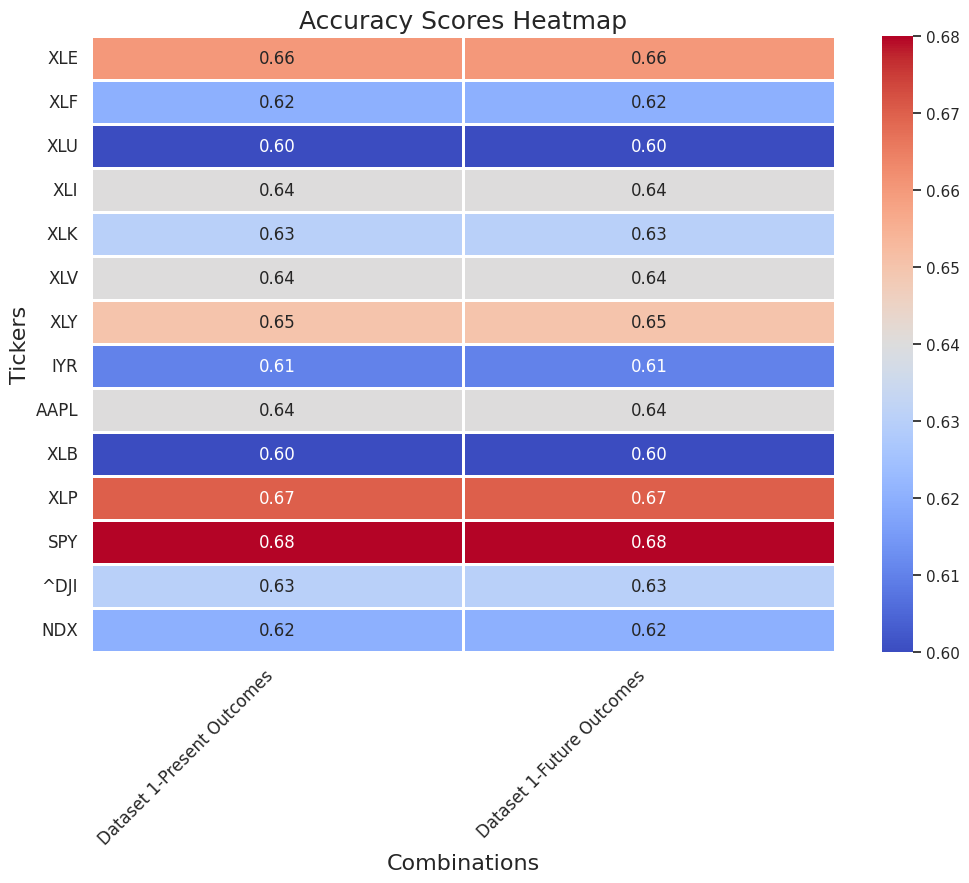

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the heatmap style
sns.set_theme(style="white")

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    combined_results_df, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=1
)

# Customize the heatmap
heatmap.set_title("Accuracy Scores Heatmap", fontsize=18)
heatmap.set_xlabel("Combinations", fontsize=16)
heatmap.set_ylabel("Tickers", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the heatmap
plt.show()

# Visulaizing specific ticker using decision tree classifier 

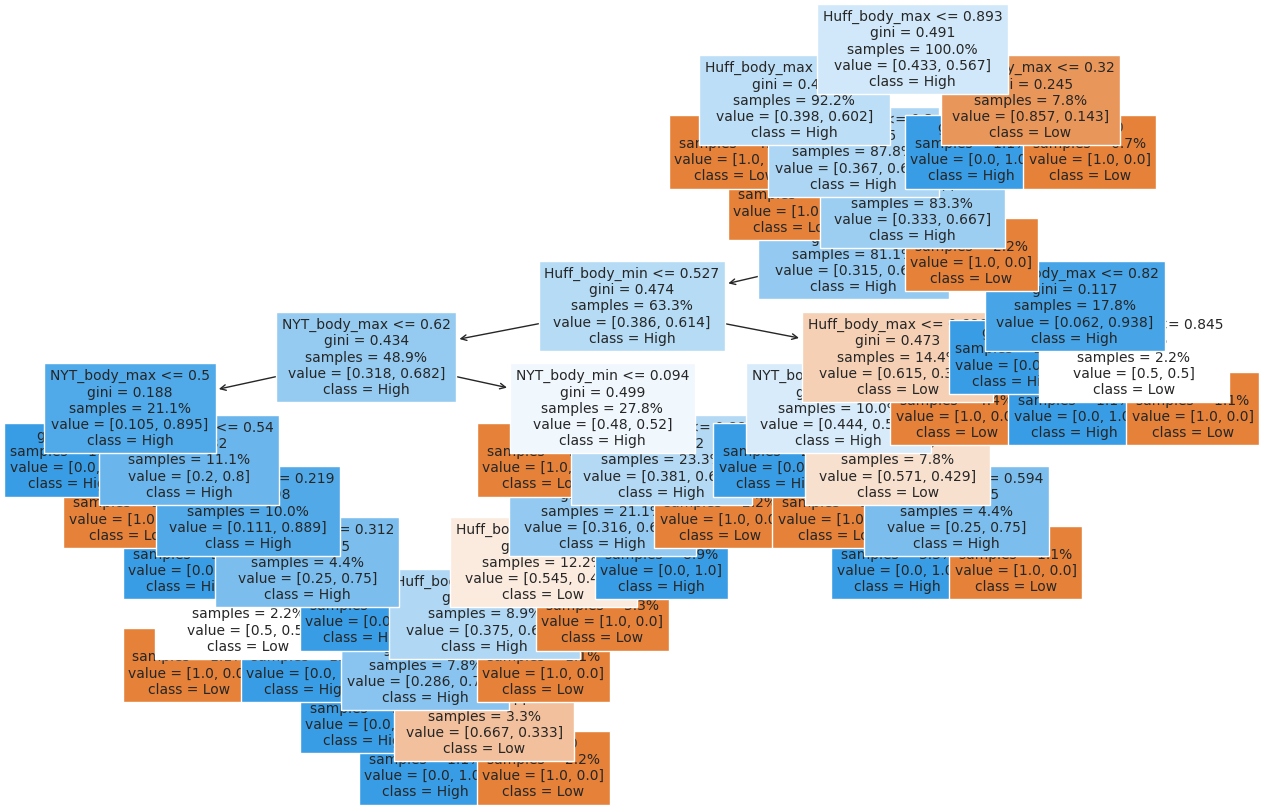

In [82]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Select a ticker and variable combination for visualization
ticker_to_visualize = 'SPY'
selected_var_to_visualize = ['guardian_body_min','guardian_body_max','Huff_body_min','Huff_body_max','NYT_body_min','NYT_body_max']

# Prepare the data
accuracy_df = stocks_df[[ticker_to_visualize] + selected_var_to_visualize]
y_nonscaled = accuracy_df[[ticker_to_visualize]]
X_nonscaled = accuracy_df.drop(columns=[ticker_to_visualize])

scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()
y = scaleOutput.fit_transform(y_nonscaled)
X = scaleInput.fit_transform(X_nonscaled)

X_train = X[:90]
y_train = y[:90]
X_valid = X[35:]
y_valid = y[35:]

# Train the decision tree
stock_decision_tree = DecisionTreeClassifier(random_state=1)
stock_decision_tree.fit(X_train, y_train.ravel())

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(stock_decision_tree, filled=True, feature_names=selected_var_to_visualize, class_names=['Low', 'High'], proportion=True, fontsize=10)
plt.show()